In [1]:
import os
import sys

import h5py

import random
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
import ipywidgets as widgets

from joblib import Parallel, delayed

import matplotlib.animation as manimation
from matplotlib import rc

In [2]:
sys.path.append("../code/")

# Import functions for handling skeleton files
from data_handling import read_skeleton_as_array, calc_quality, del_nan_rows
from standardize import correct_drugnames

# Import functions for computing features
from extract_angles import get_bend_angles, get_tan_angles
from extract_curvatures import get_curv_savgol

In [3]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Spatio-temporal contour plot of body curvature along the length of the Ciona skeleton

- Refer [Sznitman 2010](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0011631)

In [ ]:
# Red and blue colors represent positive and negative curvature values, respectively. 
# The -axis corresponds to the dimensionless position (s) along the C. elegans' body length where  
# s=0 is the head and  s=L is the tail.

## Get skeleton data & curvature data 

In [ ]:
metadata_path = os.path.join("/share/data/temp/athira/Consolidated_Skeleton_Data/",'skeletons_metadata.pkl')
skel_arrays_folder = "/share/data/temp/athira/Consolidated_Skeleton_Data/skeleton_filt_arrays_as_npy"
curv_arrays_folder = "/share/data/temp/athira/Consolidated_Skeleton_Data/filt_skel_curvatures_as_npy/"

In [ ]:
df_metadata = pd.read_pickle(metadata_path)
skel_metadata = df_metadata.sample(10)

In [ ]:
skel_metadata 

In [ ]:
#pd.options.display.max_colwidth = 100

index_cent = []
for index , row_metadata in skel_metadata.iterrows():
    skel_fname = row_metadata['filename']
    #curv_fname = f"{skel_fname.split('_skeletons')[0]}_curv_savgol_{skel_fname.split('_')[-1][:-4]}.npy"
    
    skel_array_path = os.path.join(skel_arrays_folder,skel_fname)
    #curv_array_path = os.path.join(curv_arrays_folder, curv_fname) 

    skel_array = np.load(skel_array_path)
    #curv_array = np.load(curv_array_path)
    
    if calc_quality(skel_array) == 100:
        index_cent.append(index)
    
    
    

In [ ]:
index_cent

In [ ]:

skel_fname = skel_metadata.loc[1211]['filename']
curv_fname = f"{skel_fname.split('_skeletons')[0]}_curv_savgol_{skel_fname.split('_')[-1][:-4]}.npy"

skel_array_path = os.path.join(skel_arrays_folder,skel_fname)
curv_array_path = os.path.join(curv_arrays_folder, curv_fname) 

skel_array = np.load(skel_array_path)
curv_array = np.load(curv_array_path)

if calc_quality(skel_array) == 100:
    index_cent.append(index)
    

## Defining ONE CYCLE 

In [ ]:
# An animation plot to see if there are any "cycles" in the first place !




In [ ]:
# #%matplotlib inline

# plt.rcParams['figure.figsize'] = [10, 10]
# fig = plt.figure()
# plt.xlim(np.nanmin(skel_array[:,:,0]), np.nanmax(skel_array[:,:,0]))
# plt.ylim(np.nanmin(skel_array[:,:,1]), np.nanmax(skel_array[:,:,1]))


# plt.scatter(skel_array[i,:,0],skel_array[i,:,1]) 
# # def animate(i):
    

# #     plt.scatter(skel_array[i,:,0],skel_array[i,:,1]) 

# # # Save to a video file :
# # print(manimation.writers.list()) 
# # #Writer = manimation.writers['ffmpeg']
# # #writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

# # ani = manimation.FuncAnimation(fig, animate, frames= 1000)
# # #ani.save('Ciona_swimming.mp4', writer=writer)

# # HTML(ani.to_jshtml())
# # #plt.show()

In [ ]:
slider_frame = widgets.IntSlider(value= 0,
                                        min=0,
                                        max= skel_array.shape[0]-1,
                                        step=1,
                                        description='Frames:',
                                        disabled=False,
                                        continuous_update=True,
                                        orientation='horizontal',
                                        readout=True,
                                        readout_format='d')



    
@widgets.interact
def plot_skeleton(ind_frame = slider_frame):
    
    
    fig, axes = plt.subplots(2,2,figsize=(20,15))
    
    t_start = 510
    t_end = 590
    
    axes[0,0].set_xlim(np.nanmin(skel_array[t_start:t_end,:,0]), np.nanmax(skel_array[t_start:t_end,:,0]))
    axes[0,0].set_ylim(np.nanmin(skel_array[t_start:t_end,:,1]), np.nanmax(skel_array[t_start:t_end,:,1]))
    def animate(i):

        axes[0,0].scatter(skel_array[i,:,0],skel_array[i,:,1]) 
        
    ani = manimation.FuncAnimation(fig, animate, frames= range(t_start, t_end))
    HTML(ani.to_jshtml())
    

    #axes[0,0].scatter(skel_array[ind_frame,:,0], skel_array[ind_frame,:,1])
    
    sns.set(palette='viridis')
    for ind in range(t_start, t_end):
        axes[1,0].plot(skel_array[ind,:,0], skel_array[ind,:,1])
    
    sns.heatmap(curv_array.T, ax=axes[0,1])
    sns.heatmap(curv_array[t_start:t_end, :].T, ax=axes[1,1])
    
    for ax in [axes[0,0]]:
        #ax.set_aspect('equal')
        ax.autoscale(True)
#         ax.set_xlim(np.nanmin(skel_array[:,:,0]-5), np.nanmax(skel_array[:,:,0]+5))
#         ax.set_ylim(np.nanmin(skel_array[:,:,1]-5), np.nanmax(skel_array[:,:,1]+5))


### Using files selected for eigen cionas

In [ ]:
skel_arrays_folder = os.path.join("/share/data/temp/athira/tierpsy_skeleton_files_for_eigen_npy")
_,_,skel_fnames = next(os.walk(skel_arrays_folder))
skel_array_paths = [os.path.join(skel_arrays_folder,skel_fname) for skel_fname in skel_fnames]

In [ ]:
skel_file = random.choice(skel_array_paths)
skel_array = np.load(skel_file)

In [ ]:
calc_quality(skel_array)

In [ ]:
curv_array = get_curv_savgol(skel_array)

In [ ]:

slider_frame = widgets.IntSlider(value= 0,
                                        min=0,
                                        max= skel_array.shape[0]-1,
                                        step=1,
                                        description='Frames:',
                                        disabled=False,
                                        continuous_update=False,
                                        orientation='horizontal',
                                        readout=True,
                                        readout_format='d')



    
@widgets.interact
def plot_spatiotemp_all(ind_frame = slider_frame):

    fig, axes = plt.subplots(1,2,figsize=(15,5))

    #     t_start = 510
    #     t_end = 590

    t_start = 6526
    t_end = 7526

    axes[0].set_xlim(np.nanmin(skel_array[t_start:t_end,:,0]), np.nanmax(skel_array[t_start:t_end,:,0]))
    axes[0].set_ylim(np.nanmin(skel_array[t_start:t_end,:,1]), np.nanmax(skel_array[t_start:t_end,:,1]))
    #     def animate(i):

    #         axes[0,0].scatter(skel_array[i,:,0],skel_array[i,:,1]) 

    #     ani = manimation.FuncAnimation(fig, animate, frames= range(t_start, t_end))
    #     HTML(ani.to_jshtml())


    axes[0].scatter(skel_array[ind_frame,:,0], skel_array[ind_frame,:,1])
    sns.heatmap(curv_array.T, ax=axes[1])
    
    for ax in axes:
        #ax.set_aspect('equal')
        ax.autoscale(True)

In [ ]:
slider_frame_2 = widgets.IntRangeSlider(value= [0, 50],
                                        min=0,
                                        max= skel_array.shape[0]-1,
                                        step=1,
                                        description='Frames:',
                                        disabled=False,
                                        continuous_update=False,
                                        orientation='horizontal',
                                        readout=True,
                                        readout_format='d')



    
@widgets.interact_manual
def plot_spatiotemp_wind(ind_frame = slider_frame_2):

    

    t_start = ind_frame[0]
    t_end = ind_frame[1]


    sns.set(palette='viridis')
    for ind in range(t_start, t_end):
        axes[0].plot(skel_array[ind,:,0], skel_array[ind,:,1])

    sns.heatmap(curv_array[t_start:t_end, :].T,  ax=axes[1])

    for ax in axes:
        #ax.set_aspect('equal')
        ax.autoscale(True)
#         axes[0,0].set_xlim(np.nanmin(skel_array[t_start:t_end,:,0]), np.nanmax(skel_array[t_start:t_end,:,0]))
#         axes[0,0].set_ylim(np.nanmin(skel_array[t_start:t_end,:,1]), np.nanmax(skel_array[t_start:t_end,:,1]))

# Using new (higher fps) data

In [4]:
new_skeletons_folder = "/share/data/longterm/10/Marios Tierpsy analysis/30042020_120fps/analysis 120fps/Results/"
skelfiles = [os.path.join(root,name) for root,dirs,files in os.walk(new_skeletons_folder) for name in files if name.endswith('skeletons.hdf5')]

In [5]:
skel_file = random.choice(skelfiles)

Replacing the randomly chosen file with a specific file which seems to have low number of NaN rows. 
- The time window over which spatio-temporal contour of curvature is displayed is also in this case chosen manually so as to get a nice tail beating phase. 

In [6]:
skel_file = '/share/data/longterm/10/Marios Tierpsy analysis/30042020_120fps/analysis 120fps/Results/20200430_174745_1_0m30s_None_None_None_skeletons.hdf5'
skel_array = read_skeleton_as_array(skel_file)
print(calc_quality(skel_array))
#skel_array = del_nan_rows(skel_array)

94.26855895196506


- File where turning and tail beating happens: 
    '/share/data/longterm/10/Marios Tierpsy analysis/30042020_120fps/analysis 120fps/Results/20200430_163633_1_0m30s_None_None_None_skeletons.hdf5' Frames : 2400-2500
    
- '/share/data/longterm/10/Marios Tierpsy analysis/30042020_120fps/analysis 120fps/Results/20200430_174745_1_0m30s_None_None_None_skeletons.hdf5' Frames : 780-1302

In [7]:
skel_file

'/share/data/longterm/10/Marios Tierpsy analysis/30042020_120fps/analysis 120fps/Results/20200430_174745_1_0m30s_None_None_None_skeletons.hdf5'

### Calculate neck points in each of the frames

Neck points need to be calcuated for each frame. To avoid the occasional kinks (with high curvatures) in the tail to be identified as necks, we only look for neck point in the 3:26 range of skeleton points.  

In [8]:
def calc_neck_points(cont_widths):
    
    diff_contour = np.diff(cont_widths)
    diff_contour = diff_contour[:,3:26]
    neck_points = np.argmin(diff_contour, axis=1)+4
    
    return neck_points

In [9]:
skel_obj = h5py.File(skel_file,'r')
contour_width = np.array(skel_obj['contour_width'])
neck_points = calc_neck_points(contour_width)

## Calculate the curvatures

Let us calculate the savgol curvatures for the skeleton file

In [10]:
curv_array = get_curv_savgol(skel_array)

It would be better to take a window of the video wherein the skeleton length doesn't vary too much. This is important when we have to plot the overlapped skeletons (aligned to head) over the window for the paper.

In [ ]:

skel_length_array = np.array(skel_obj['skeleton_length'])

slider_interval = widgets.IntRangeSlider(
                            value=[780, 1302],
                            min=0,
                            max=skel_array.shape[0]-1,
                            step=1,
                            description='Test:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='d',
                        )


@widgets.interact_manual
def plot_skel_length(ind_interval = slider_interval):

    fig, axes = plt.subplots(2,1,figsize=(15,10), constrained_layout = True)
    
    t_start = ind_interval[0]
    t_end = ind_interval[1]
    
    x_time = np.round((np.arange(0,t_end-t_start)/120),2)
    #print(x_time)
    cols = np.arange(0,curv_array.shape[1],1)
    cols = cols.astype(str)
    
    cols[0] = "Head"
    cols[-1] = "Tail End"
    df_curv_temp1 = pd.DataFrame(index=x_time, data=curv_array[t_start:t_end], columns=cols)
    sns.heatmap(df_curv_temp1.T, ax=axes[0], yticklabels = 4, xticklabels = 6)
    axes[0].set_title(f"Curvature along the skeleton : for {(t_end-t_start)/8} beating cycles", pad=20)
    axes[0].set_xlabel('Time in seconds')
    axes[0].set_ylabel('Skeleton points')
    #sns.heatmap(curv_array[t_start:t_end].T, ax=axes[0])
    axes[1].plot(skel_length_array[t_start:t_end])
    plt.savefig('contour_zoomin.png', bbox_inches='tight')


In [ ]:


# ind_frames = np.arange(0,curv_array.shape[0],1)
# ind_time = (axes.get_xticklabels())
# axes.set_xticks(np.arange(0,curv_array.shape[0],500))
# axes.set_xticklabels(np.arange(0,curv_array.shape[0],480)/120)


Maybe it is good to visualize how ciona moves in the arena 

(3664, 2)


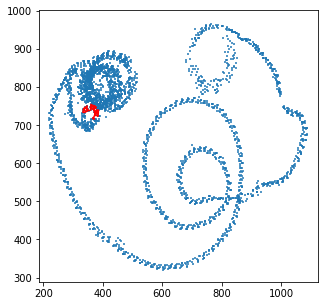

In [11]:
fig, axes = plt.subplots(1,1,figsize=(5,5))
axes.set_xlim(np.nanmin(skel_array[:,:,0])-10, np.nanmax(skel_array[:,:,0])+20)
axes.set_ylim(np.nanmin(skel_array[:,:,1])-10, np.nanmax(skel_array[:,:,1])+20)

neck_list = []
for i in range(skel_array.shape[0]):
    neck_list.append(skel_array[i,neck_points[i]])
    
neck_array = np.vstack(neck_list)
print(neck_array.shape)

plt.scatter(neck_array[:,0], neck_array[:,1], s=2, marker='_')
#c = np.arange(skel_array.shape[0]),cmap='plasma'

plt.plot(neck_array[2880:2936,0], neck_array[2880:2936,1],c='r')

# for i in range(0,skel_array.shape[0], 200):
#     plt.scatter(skel_array[i,neck_points[i], 0], skel_array[i,neck_points[i], 1], s=50, marker='*', c='r')

Let us see how the skeletons move in arena in a chosen time window. 

In [ ]:
# ANIMATION without aligning the skeletons at the neck point

fig, axes = plt.subplots(1,1,figsize=(5,5))
t_start = 2914
t_end = 2922
axes.set_xlim(np.nanmin(skel_array[t_start:t_end,:,0])-10, np.nanmax(skel_array[t_start:t_end,:,0])+20)
axes.set_ylim(np.nanmin(skel_array[t_start:t_end,:,1])-10, np.nanmax(skel_array[t_start:t_end,:,1])+20)
    
def animate(i):
        
        neck_ind = neck_points[i]
        neck_ind_ori = neck_points[t_start]
        neck_pt = skel_array[i,neck_ind,:]
        neck_pt_ori = skel_array[t_start,neck_ind_ori,:]
        
        
        # align at the neck
        skel_frame = skel_array[i,:,:] 
        
        skel_, = axes.plot(skel_frame[:,0],skel_frame[:,1]) 
        axes.scatter(skel_frame[neck_ind,0],skel_frame[neck_ind,1]) 
        return(skel_,)
        
ani = manimation.FuncAnimation(fig, animate, frames= range(t_start, t_end), blit = True)
HTML(ani.to_jshtml())

# Save to a video file :

Writer = manimation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Athira'), bitrate=1800)

ani = manimation.FuncAnimation(fig, animate, frames= 1000)
ani.save('Ciona_beating_T.mp4', writer=writer)



In [ ]:
slider_frame = widgets.IntSlider(value= 0,
                                        min=0,
                                        max= skel_array.shape[0]-1,
                                        step=1,
                                        description='Frames:',
                                        disabled=False,
                                        continuous_update=True,
                                        orientation='horizontal',
                                        readout=True,
                                        readout_format='d')



slider_beat_period = widgets.IntRangeSlider(
                            value=[2217, 2315],
                            min=0,
                            max=skel_array.shape[0]-1,
                            step=1,
                            description='Window:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='d',
                        )


@widgets.interact_manual
def plot_spatiotemp_fps(ind_frame = slider_frame, ind_period = slider_beat_period):
    
    
    
    fig, axes = plt.subplots(2,2,figsize=(20,15))
    
    t_start = ind_period[0]
    t_end = ind_period[1]
    
    axes[0,0].set_xlim(np.nanmin(skel_array[t_start:t_end,:,0]), np.nanmax(skel_array[t_start:t_end,:,0]))
    axes[0,0].set_ylim(np.nanmin(skel_array[t_start:t_end,:,1]), np.nanmax(skel_array[t_start:t_end,:,1]))
    


    def animate(i):

        skel_ = axes[0,0].scatter(skel_array[i,:,0],skel_array[i,:,1]) 
        return(skel_,)
        
    ani = manimation.FuncAnimation(fig, animate, frames= range(t_start, t_end), blit = True)
#     HTML(ani.to_jshtml())
#     rc('animation', html='jshtml')
#     ani
    HTML(ani.to_html5_video())

    #axes[0,0].scatter(skel_array[ind_frame,:,0], skel_array[ind_frame,:,1])
    
    sns.set(palette='viridis')
    for ind in range(t_start, t_end):
        axes[1,0].plot(skel_array[ind,:,0], skel_array[ind,:,1])
    
    sns.heatmap(curv_array.T, ax=axes[0,1])
    sns.heatmap(curv_array[t_start:t_end, :].T, ax=axes[1,1])
    
    for ax in [axes[0,0]]:
        #ax.set_aspect('equal')
        ax.autoscale(True)
#         ax.set_xlim(np.nanmin(skel_array[:,:,0]-5), np.nanmax(skel_array[:,:,0]+5))
#         ax.set_ylim(np.nanmin(skel_array[:,:,1]-5), np.nanmax(skel_array[:,:,1]+5))


### Animation with neck aligned 

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(5,5))
t_start = 2914
t_end = 2923
axes.set_xlim(np.nanmin(skel_array[t_start:t_end,:,0])-20, np.nanmax(skel_array[t_start:t_end,:,0])+20)
axes.set_ylim(np.nanmin(skel_array[t_start:t_end,:,1])-20, np.nanmax(skel_array[t_start:t_end,:,1])+20)
    
def animate(i):
        
        neck_ind = neck_points[i]
        neck_ind_ori = neck_points[t_start]
        neck_pt = skel_array[i,neck_ind,:]
        neck_pt_ori = skel_array[t_start,neck_ind_ori,:]
        diff = neck_pt_ori - neck_pt
        
        # align at the neck
        skel_frame = skel_array[i,:,:] + diff 
        
        skel_, = axes.plot(skel_frame[:,0],skel_frame[:,1]) 
        axes.scatter(skel_frame[neck_ind,0],skel_frame[neck_ind,1]) 
        return(skel_,)
        
ani = manimation.FuncAnimation(fig, animate, frames= range(t_start, t_end), blit = True)
HTML(ani.to_jshtml())

# Save to a video file :

Writer = manimation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Athira'), bitrate=1800)

ani = manimation.FuncAnimation(fig, animate, frames= 1000)
ani.save('Ciona_beating_Tal.mp4', writer=writer)



Static plot of overlapped skeletons

/share/python-virtual-environments/ciona_behaviour/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """Entry point for launching an IPython kernel.


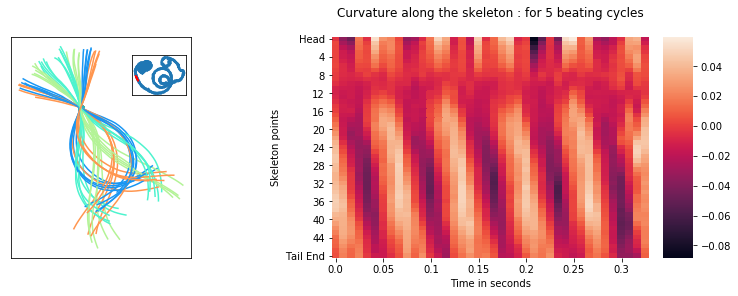

In [17]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

# Smoothing the skeletons with savgol filter
from extract_angles import savgol_skeleton
skel_array_savgol = savgol_skeleton(skel_array)


dict_motion = {'straight':[1531, 1571, 4, 'rainbow',30,30,1] }

fig, axes = plt.subplots(1,2,figsize=(11,4), constrained_layout=True)


key = 'straight'
c_pal = itertools.cycle(sns.color_palette(dict_motion[key][3],dict_motion[key][2]))


t_start = dict_motion[key][0]
t_end = dict_motion[key][1]

neck_ind_ori = neck_points[t_start]
neck_pt_ori = skel_array_savgol[t_start,neck_ind_ori,:]


for i in range(t_start,t_end,1):

    neck_ind = neck_points[i]
    neck_pt = skel_array_savgol[i,neck_ind,:]

    diff = neck_pt_ori - neck_pt

    # align at the neck
    skel_frame = skel_array_savgol[i,:,:] + diff 
    color = next(c_pal)
    
    skel_, = axes[0].plot(skel_frame[:,0],skel_frame[:,1],color=color)
    axes[0].scatter(skel_frame[neck_ind,0],skel_frame[neck_ind,1]) 


# left, bottom, width, height = [0.6, 0.65, 0.2, 0.2]
# ax2 = fig.add_axes([left, bottom, width, height])



neck_list = []
for i in range(skel_array.shape[0]):
    neck_list.append(skel_array[i,neck_points[i]])
neck_array = np.vstack(neck_list)


inset_ax = inset_axes(axes[0],
                  height=f"{dict_motion[key][4]}%", # set height
                  width=f"{dict_motion[key][5]}%", # and width
                  loc=dict_motion[key][6])

inset_ax.scatter(neck_array[:,0], neck_array[:,1], s=2, marker='.')
inset_ax.plot(neck_array[t_start:t_end,0], neck_array[t_start:t_end,1],c='r')


# sns.heatmap(curv_array[t_start:t_end,:].T,ax=axes[1])
# cmap=sns.color_palette('inferno',100)

frame_rate = 120
x_time = np.round((np.arange(0,t_end-t_start)/frame_rate),2)
cols = np.arange(0,curv_array.shape[1],1)
cols = cols.astype(str)

cols[0] = "Head"
cols[-1] = "Tail End"
df_curv_temp1 = pd.DataFrame(index=x_time, data=curv_array[t_start:t_end], columns=cols)
sns.heatmap(df_curv_temp1.T, ax=axes[1], yticklabels = 4, xticklabels = 6)
axes[1].set_title(f"Curvature along the skeleton : for {int((t_end-t_start)/8)} beating cycles", pad=20)
axes[1].set_xlabel('Time in seconds')
axes[1].set_ylabel('Skeleton points')


for ax in [inset_ax, axes[0]]:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')
    
# fig.savefig('../figures1/ciona_turns_vs_straight_v2_a.svg')

In [ ]:
# from mpl_toolkits.axes_grid.inset_locator import inset_axes


# # axes.set_xlim(np.nanmin(skel_array[t_start:t_end,:,0])-5, np.nanmax(skel_array[t_start:t_end,:,0])+20)
# # axes.set_ylim(np.nanmin(skel_array[t_start:t_end,:,1])-20, np.nanmax(skel_array[t_start:t_end,:,1])+5)


# # Smoothing the skeletons with savgol filter
# from extract_angles import savgol_skeleton
# skel_array_savgol = savgol_skeleton(skel_array)

#dict_motion = {'straight':[1531, 1587, 8], 'circle':[700,756, 8], 'turn':[2880,2936, 8]}
dict_motion = {'zoom_straight':[1548, 1556, 4,'inferno',20,20,1],
               'zoom_turn':[738, 746, 4,'inferno',20,20,'lower center'], 
               'zoom_sharp':[2914, 2922, 4,'inferno',20,20,'lower left']}

fig, axes = plt.subplots(2,len(dict_motion.keys()),figsize=(24,10), constrained_layout=True)
inset_axes_list = [] 


for ind, key in enumerate(dict_motion.keys()):
    
    c_pal = itertools.cycle(sns.color_palette('rainbow',8))

    
    t_start = dict_motion[key][0]
    t_end = dict_motion[key][1]

    # To align the neck points
    neck_ind_ori = neck_points[t_start]
    neck_pt_ori = skel_array_savgol[t_start,neck_ind_ori,:]

    
    for i in range(t_start,t_end,1):

        neck_ind = neck_points[i]
        neck_pt = skel_array_savgol[i,neck_ind,:]

        diff = neck_pt_ori - neck_pt

        # align at the neck
        skel_frame = skel_array_savgol[i,:,:] + diff 
        color = next(c_pal)
        
        # Quick fix for rotating the axes to fit in the subset
        if key == 'zoom_straight':
            skel_, = axes[0][ind].plot(skel_frame[:,0],skel_frame[:,1],color=color)
            axes[0][ind].scatter(skel_frame[neck_ind,0],skel_frame[neck_ind,1]) 
        else:
            skel_, = axes[0][ind].plot(skel_frame[:,1],skel_frame[:,0],color=color)
            axes[0][ind].scatter(skel_frame[neck_ind,1],skel_frame[neck_ind,0]) 
        


    neck_list = []
    for i in range(skel_array.shape[0]):
        neck_list.append(skel_array[i,neck_points[i]])

    neck_array = np.vstack(neck_list)

    
    
    inset_ax = inset_axes(axes[0][ind],
                      height=f"{40}%", # set height
                      width=f"{40}%", # and width
                      loc='upper right')
    inset_axes_list.append(inset_ax)
    

    inset_ax.scatter(neck_array[t_start-100:t_end+100,0], neck_array[t_start-100:t_end+100,1], s=2, marker='.')
    inset_ax.plot(neck_array[t_start-16:t_end+16,0], neck_array[t_start-16:t_end+16,1],c='r')


#     sns.heatmap(curv_array[t_start-16:t_end+16,:].T,ax=axes[1][ind], vmax= 0.11, vmin=-0.11, cbar=((ind==2)),
#                 cmap='rainbow')
    
    frame_rate = 120
    x_time = np.round((np.arange(0,t_end-t_start+32)/frame_rate),2)
    cols = np.arange(0,curv_array.shape[1],1)
    cols = cols.astype(str)

    cols[0] = "Head"
    cols[-1] = "Tail End"
    df_curv_temp1 = pd.DataFrame(index=x_time, data=curv_array[t_start-16:t_end+16], columns=cols)
    sns.heatmap(df_curv_temp1.T, ax=axes[1][ind], yticklabels = 4, xticklabels = 6, cmap='rainbow',
                vmax= 0.11, vmin=-0.11, cbar=((ind==2)))
    axes[1][ind].set_title(f"Curvature along the skeleton : for {int((t_end-t_start+32)/8)} beating cycles", pad=20)
    axes[1][ind].set_xlabel('Time in seconds')
    axes[1][ind].set_ylabel('Skeleton points')

for ax in axes[0]:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('equal')
#     ax.axis('off')

for ax in inset_axes_list:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')
    
fig.savefig('ciona_turns_vs_straight_v2_b.svg')

## Try rotating the skeletons to align them vertically 

- thanks to Daniel, now this can be done ! 

### Playing with rotations

THE PLAN 
- Bring the neck point to a selected origin point, let us (0,0). 
- Now, find the angle by which the end point has to be rotated so as to bring it on to the vertical line.
- Rotate all other points on the skeleton by the same angle

In [12]:
def translate(skel_coords, neck_ind):
    
    diff = skel_coords[neck_ind]
    skel_coords_trans = skel_coords - diff
    
    return skel_coords_trans

In [13]:
def angle(x,y, degrees = False):
    angle = np.arctan2(y,x)
#     if y < 0:
#         angle *=-1
    if not degrees:
        return(angle)
    else:
        return(np.degrees(angle))

In [14]:
def rotate_matrix(skel_array,angle):
    xr = skel_array[:,0]*np.cos(angle) - skel_array[:,1]* np.sin(angle)
    yr = skel_array[:,0]*np.sin(angle) + skel_array[:,1]* np.cos(angle)
    return xr,yr

In [15]:
def rotate(x, y, angle):
    xr = x*np.cos(angle) - y* np.sin(angle)
    yr = x*np.sin(angle) + y* np.cos(angle)
    return xr,yr

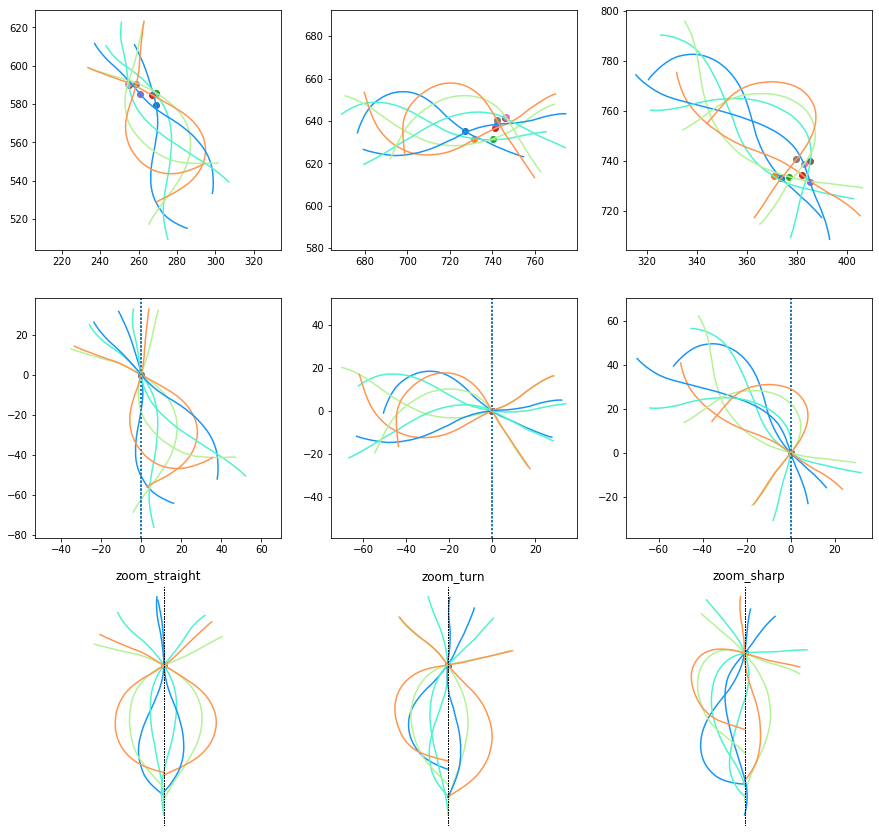

In [18]:
fig, axes = plt.subplots(3,3,figsize=(15,15))

dict_motion = {'zoom_straight':[1548, 1556, 8,'inferno',20,20,1],
               'zoom_turn':[738, 746, 8,'inferno',20,20,'lower center'], 
               'zoom_sharp':[2914, 2922, 8,'inferno',20,20,'lower left']}

for i, key in enumerate(dict_motion.keys()):
    
    c_pal = itertools.cycle(sns.color_palette('rainbow',4))
    
    t_start = dict_motion[key][0]
    t_end = dict_motion[key][1] 
    
    for ind in np.arange(t_start, t_end):
        skel_coords = skel_array_savgol[ind,:,:]
        neck_ind = neck_points[ind]
        
        c_n = next(c_pal)

        axes[0][i].plot(skel_coords[:,0],skel_coords[:,1], color=c_n)
        axes[0][i].scatter(skel_coords[neck_ind,0],skel_coords[neck_ind,1])
        axes[0][i].axis('equal')

        # Let us move the neck to the origin
        skel_coords_trans = translate(skel_coords,neck_ind)
        axes[1][i].plot(skel_coords_trans[:,0],skel_coords_trans[:,1], color=c_n)
        axes[1][i].scatter(skel_coords_trans[neck_ind,0],skel_coords_trans[neck_ind,1])
        axes[1][i].axis('equal')
        axes[1][i].axvline(x=0, ls=':')

        # Find the angle by which the tail tip has to be rotated for it to fall on the vertical line through origin
        rot_angle = angle(skel_coords_trans[-1,0],skel_coords_trans[-1,1], degrees = False)
#         print(np.rad2deg(rot_angle))

        #rotate all the points in the skeleton
        if rot_angle > np.pi/2:
            rotation = 3*(np.pi/2)-rot_angle
        elif rot_angle < (-1*np.pi/2):
            rotation = -(np.pi/2+rot_angle)
        elif ((rot_angle > 0) & (rot_angle <= np.pi/2)):
            rotation = (np.pi/2+rot_angle)
        else:
            rotation = -(np.pi/2+rot_angle)
        
            
            
        xr,yr = rotate_matrix(skel_coords_trans, rotation)
        axes[2][i].plot(xr,yr, color = c_n)
        axes[2][i].scatter(xr[neck_ind],yr[neck_ind])
        axes[2][i].axis('equal')
        axes[2][i].axis('off')
        axes[2][i].axvline(x=0, ls=':',c='k',linewidth=1)
        axes[2][i].set_title(key)

So, we had a misunderstanding. Let us go back and try to vertically align the first skeleton (first frame). Then we rotate rest of the skeletons by the same angle which by the first one had to be rotated to align it vertically. So that their relative progression (?) is preserved. 

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15,15))

for i, key in enumerate(dict_motion.keys()):
    
    c_pal = itertools.cycle(sns.color_palette('rainbow',8))
    
    t_start = dict_motion[key][0]
    t_end = dict_motion[key][1] 
    
    for ind in np.arange(t_start, t_end):
        skel_coords = skel_array_savgol[ind,:,:]
        neck_ind = neck_points[ind]
        
        c_n = next(c_pal)

        axes[0][i].plot(skel_coords[:,0],skel_coords[:,1], color=c_n)
        axes[0][i].scatter(skel_coords[neck_ind,0],skel_coords[neck_ind,1])
        axes[0][i].axis('equal')

        # Let us move the neck to the origin
        skel_coords_trans = translate(skel_coords,neck_ind)
        axes[1][i].plot(skel_coords_trans[:,0],skel_coords_trans[:,1], color=c_n)
        axes[1][i].scatter(skel_coords_trans[neck_ind,0],skel_coords_trans[neck_ind,1])
        axes[1][i].axis('equal')
        axes[1][i].axvline(x=0, ls=':')

        if ind == t_start:
            # Find the angle by which the tail tip has to be rotated for it to fall on the vertical line through origin
            rot_angle = angle(skel_coords_trans[-1,0],skel_coords_trans[-1,1], degrees = False)
            #         print(np.rad2deg(rot_angle))

        #rotate all the points in the skeleton
        if rot_angle > np.pi/2:
            rotation = 3*(np.pi/2)-rot_angle
        elif rot_angle < (-1*np.pi/2):
            rotation = -(np.pi/2+rot_angle)
        elif ((rot_angle > 0) & (rot_angle <= np.pi/2)):
            rotation = (np.pi/2+rot_angle)
        else:
            rotation = -(np.pi/2+rot_angle)



        xr,yr = rotate_matrix(skel_coords_trans, rotation)
        axes[2][i].plot(xr,yr, color = c_n)
        axes[2][i].scatter(xr[neck_ind],yr[neck_ind])
        axes[2][i].axis('equal')
        axes[2][i].axis('off')
#         axes[2][i].axvline(x=0, ls=':',c='k',linewidth=1)
        axes[2][i].set_title(key)

### For paper 

In [ ]:
# from mpl_toolkits.axes_grid.inset_locator import inset_axes


# # axes.set_xlim(np.nanmin(skel_array[t_start:t_end,:,0])-5, np.nanmax(skel_array[t_start:t_end,:,0])+20)
# # axes.set_ylim(np.nanmin(skel_array[t_start:t_end,:,1])-20, np.nanmax(skel_array[t_start:t_end,:,1])+5)


# # Smoothing the skeletons with savgol filter
# from extract_angles import savgol_skeleton
# skel_array_savgol = savgol_skeleton(skel_array)

#dict_motion = {'straight':[1531, 1587, 8], 'circle':[700,756, 8], 'turn':[2880,2936, 8]}
dict_motion = {'Straight':[1548, 1556, 4,'inferno',20,20,1],
               'Shallow turn':[738, 746, 4,'inferno',20,20,'lower center'], 
               'Sharp turn':[2914, 2922, 4,'inferno',20,20,'lower left']}

fig, axes = plt.subplots(2,len(dict_motion.keys()),figsize=(24,10), constrained_layout=True, dpi=100)
inset_axes_list = [] 


for ind, key in enumerate(dict_motion.keys()):
    
    c_pal = itertools.cycle(sns.color_palette('rainbow',8))

    
    
    t_start = dict_motion[key][0]
    t_end = dict_motion[key][1] 
    
    for i in np.arange(t_start, t_end):
        skel_coords = skel_array_savgol[i,:,:]
        neck_ind = neck_points[i]
        
        c_n = next(c_pal)

        # Let us move the neck to the origin
        skel_coords_trans = translate(skel_coords,neck_ind)


        if i == t_start:
            # Find the angle by which the tail tip has to be rotated for it to fall on the vertical line through origin
            rot_angle = angle(skel_coords_trans[-1,0],skel_coords_trans[-1,1], degrees = False)
            #         print(np.rad2deg(rot_angle))

        #rotate all the points in the skeleton
        if rot_angle > np.pi/2:
            rotation = 3*(np.pi/2)-rot_angle
        elif rot_angle < (-1*np.pi/2):
            rotation = -(np.pi/2+rot_angle)
        elif ((rot_angle > 0) & (rot_angle <= np.pi/2)):
            rotation = (np.pi/2+rot_angle)
        else:
            rotation = -(np.pi/2+rot_angle)



        xr,yr = rotate_matrix(skel_coords_trans, rotation)
        axes[0][ind].plot(xr,yr, color = c_n,lw=3)
        axes[0][ind].scatter(xr[neck_ind],yr[neck_ind])
        axes[0][ind].axis('equal')
        axes[0][ind].axis('off')
        axes[0][ind].axvline(x=0, ls='-.',c='k',linewidth=0.5, alpha=0.3)
        axes[0][ind].set_title(key)



    neck_list = []
    for i in range(skel_array.shape[0]):
        neck_list.append(skel_array[i,neck_points[i]])

    neck_array = np.vstack(neck_list)

    
    
    inset_ax = inset_axes(axes[0][ind],
                      height=f"{30}%", # set height
                      width=f"{30}%", # and width
                      loc='upper right')
    inset_axes_list.append(inset_ax)
    
    if ind !=2:
        inset_ax.scatter(neck_array[t_start-100:t_end+100,0], neck_array[t_start-100:t_end+100,1], s=2, marker='.')
    else:
        inset_ax.scatter(neck_array[t_start-200:t_end+200,0], neck_array[t_start-200:t_end+200,1], s=2, marker='.')
        
    inset_ax.plot(neck_array[t_start-16:t_end+16,0], neck_array[t_start-16:t_end+16,1],c='r')
    

#     sns.heatmap(curv_array[t_start-16:t_end+16,:].T,ax=axes[1][ind], vmax= 0.11, vmin=-0.11, cbar=((ind==2)),
#                 cmap='rainbow')
    
    frame_rate = 120
    x_time = np.round((np.arange(0,t_end-t_start+32)/frame_rate),2)
    cols = np.arange(0,curv_array.shape[1],1)
    cols = cols.astype(str)

    cols[0] = "Head"
    cols[-1] = "Tail End"
    df_curv_temp1 = pd.DataFrame(index=x_time, data=curv_array[t_start-16:t_end+16], columns=cols)
    sns.heatmap(df_curv_temp1.T, ax=axes[1][ind], yticklabels = 4, xticklabels = 6, cmap='magma',
                vmax= 0.11, vmin=-0.11, cbar=((ind==2)))
    axes[1][ind].set_title(f"Curvature along the skeleton : for {int((t_end-t_start+32)/8)} beating cycles", pad=20)
    axes[1][ind].set_xlabel('Time in seconds')
    axes[1][ind].set_ylabel('Skeleton points')

for ax in axes[0]:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('equal')
#     ax.axis('off')

for ax in inset_axes_list:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('equal')
    


# fig.savefig('../figures1/ciona_turns_vs_straight_v2_c.svg')



## Beating frequency

Let us try to figure out what the tail beating period or frequency is 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
slider_interval1 = widgets.IntRangeSlider(
                            value=[780, 1302],
                            min=0,
                            max=skel_array.shape[0]-1,
                            step=1,
                            description='Test:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='d',
                        )

slider_skel_pt = widgets.IntSlider(
                            value=29,
                            min=0,
                            max=skel_array.shape[1]-1,
                            step=1,
                            description='Test:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='d',
                        )

@widgets.interact_manual
def plot_skel_length(ind_interval1 = slider_interval1, skel_pt = slider_skel_pt):

    fig, axes = plt.subplots(2,2,figsize=(25,15), constrained_layout = True)
    #plt.subplots_adjust(wspace = 0.2, hspace= 0.2)
    
    t_start1 = ind_interval1[0]
    t_end1 = ind_interval1[1]
    
    x_time = np.round((np.arange(0,t_end1-t_start1)/120),2)
#     print(x_time)
    
    cols = np.arange(0,curv_array.shape[1],1)
    cols = cols.astype(str)
    
    cols[0] = "Head"
    cols[-1] = "Tail End"
    
    df_curv_temp = pd.DataFrame(index=x_time, data=curv_array[t_start1:t_end1], columns=cols)
    sns.heatmap(data= df_curv_temp.T, xticklabels= 6, yticklabels=6, ax=axes[0,0])
    #sns.heatmap(curv_array[t_start1:t_end1].T, ax=axes[0,0], xticklabels= )
    import matplotlib.ticker as ticker
#     axes[0,0].xaxis.set_major_locator(ticker.MultipleLocator(0))
#     axes[0,0].xaxis.set_major_formatter(ticker.ScalarFormatter())
    
    
    axes[0,0].set_title(f"Curvature during {(t_end1-t_start1)/8} beating cycles", pad=20)
    axes[0,0].set_ylabel('Skeleton points')
    axes[0,0].set_xlabel('Time in seconds')
    
    
    axes[1,1].xcorr(curv_array[t_start1:t_end1,skel_pt-10],curv_array[t_start1:t_end1,skel_pt+10], maxlags= 40)
    #axes[1,1].xcorr(curv_array[t_start1:t_end1,skel_pt-10],curv_array[t_start1:t_end1,skel_pt+10], maxlags= (t_end1 - t_start1 - 5))
    axes[1,1].set_title(f"Cross correlation of {skel_pt-10}th with {skel_pt+10}th skeleton points", pad=20)
    axes[1,1].set_xlabel('Lag in frames')
    
    curv_sample_colors = sns.color_palette('hls',4)
#     axes[1,0].plot(x_time,curv_array[t_start1:t_end1,skel_pt], label=f"{skel_pt}th", c=curv_sample_colors[0])
    axes[1,0].plot(x_time,curv_array[t_start1:t_end1,17], label=f"{17}th", c=curv_sample_colors[1])
    axes[1,0].plot(x_time,curv_array[t_start1:t_end1,48], label=f"{48}th", c=curv_sample_colors[2])
    axes[1,0].set_title("Some sample curvatures", pad=20)
#     axes[1,0].set_title("Sample curvature time series", pad=20)
    axes[1,0].set_ylabel('Curvature')
    axes[1,0].set_xlabel('Time in seconds')
    axes[1,0].legend()
    
    plot_acf(curv_array[t_start1:t_end1,skel_pt], lags= 40, ax=axes[0,1]);
    #plot_acf(curv_array[t_start1:t_end1,skel_pt], lags= (t_end1 - t_start1 - 5), ax=axes[0,1]);
    axes[0,1].set_title(f"Autocorrelation of {skel_pt}th skeleton point", pad=20)
    axes[0,1].set_xlabel('Lag in frames')
    
    plt.savefig('beating_period_120fps_longTurn_v1.0.png')

In [ ]:
from scipy import signal

t_start = 780
t_end = 1302

skel_pt = 46

skel_array_ = del_nan_rows(skel_array)
curv_array_ = get_curv_savgol(skel_array_)
print(curv_array_.shape)
curv_array_ = curv_array_[t_start:t_end,:]
wavelet_transform = signal.cwt(curv_array_[:, skel_pt], signal.ricker, np.arange(1,48))
x_time_all = np.round((np.arange(0,curv_array_.shape[0])/120),0)

    
fig, axes = plt.subplots(4,1,figsize=(20,20), constrained_layout = True)
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.heatmap(wavelet_transform,ax=axes[0], cmap=cmap)
# sns.heatmap(curv_array.T,ax=axes[1])
axes[0].imshow(wavelet_transform, aspect = 'auto', cmap = 'jet')
axes[0].grid(False)

df_curv_all_temp = pd.DataFrame(index=x_time_all, data=curv_array_)
sns.heatmap(data=df_curv_all_temp.T, xticklabels= 120,yticklabels= 5,ax=axes[1])

axes[2].plot(curv_array_[:, skel_pt])
x_frames = np.arange(330,420)
axes[2].plot(x_frames, curv_array_[330:420, skel_pt])

axes[3].plot(skel_array_[t_start:t_end,skel_pt,0],skel_array_[t_start:t_end,skel_pt,1])
axes[3].plot(skel_array_[t_start+330:t_start+420,skel_pt,0],skel_array_[t_start+330:t_start+420,skel_pt,1])
axes[3].set_aspect('equal')

In [ ]:
plt.plot(curv_array_[660:690, 19])

### Beating modes ?

In [ ]:
from scipy import signal

# Choose lower fps file 
new_skeletons_folder = "/share/data/temp/athira/tierpsy_skeleton_files_for_eigen_npy/"
skelfiles_low_fps = [os.path.join(root,name) for root,dirs,files in os.walk(new_skeletons_folder) for name in files if name.endswith('.npy')]

skel_file_low_fps = random.choice(skelfiles_low_fps)
skel_array_lfps = np.load(skel_file_low_fps)
print(calc_quality(skel_array_lfps))
# skel_array_lfps = del_nan_rows(skel_array_lfps)

In [ ]:
curv_array_lfps = get_curv_savgol(skel_array_lfps)
print(curv_array_lfps.shape)
wavelet_transform_lfps = signal.cwt(curv_array_lfps[0:800, 29], signal.ricker, np.arange(1,40))

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(20,15), constrained_layout = True)
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.heatmap(wavelet_transform,ax=axes[0], cmap=cmap)
# sns.heatmap(curv_array.T,ax=axes[1])
axes[0].imshow(wavelet_transform_lfps, aspect = 'auto', cmap = 'jet')
axes[0].grid(False)
sns.heatmap(curv_array_lfps[0:800].T,ax=axes[1])

In [ ]:
vec2 = signal.ricker(100, 35)
plt.plot(vec2)